# Exercise 6.2 Exporatory Analysis
Comparing python visualization libraries to conduct some expoloratory analysis between variables in the data set

## To Import Libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

## To Import Data

In [63]:
# To check the version of matplot library I have
matplotlib.__version__

'3.7.0'

In [64]:
# To Define path 
path = r'/Users/oluwaseunodusanya/Desktop/23.07.2023_Germany Apartment Rental Offer Analysis'

In [65]:
# To import Data
df_rental = pd.read_pickle(os.path.join(path, '02 Data','02 Prepared Data','apartment_rental_data.pkl'))

In [66]:
# To call the imported data
df_rental.head()

,state,service charge,heating type,telekom tv offer,telekom hybrid upload speed,newly constructed,balcony,picture count,telekom upload speed,total rent,...,postal code,number of rooms,thermalChar,floor,garden,city/town,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,10.0,840.0,...,44269,4.0,181.4,1.0,True,Schüren,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,10.0,NaN,...,67459,3.0,NaN,NaN,False,Böhl_Iggelheim,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.4,1300.0,...,1097,3.0,NaN,3.0,False,Äußere_Neustadt_Antonstadt,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,40.0,NaN,...,9599,3.0,86.0,3.0,False,Freiberg,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,NaN,903.0,...,28213,3.0,188.9,1.0,False,Neu_Schwachhausen,NaN,NaN,NaN,Feb20


In [67]:
df_rental['year constructed']

0         1965.0
1         1871.0
2         2019.0
3         1964.0
4         1950.0
           ...  
268845    2016.0
268846    1983.0
268847    1965.0
268848    2019.0
268849    1972.0
Name: year constructed, Length: 267080, dtype: float64

In [68]:
df_rental.rename(columns = {'firingTypes' : 'energy source', 'thermalChar': 'energy need'}, inplace = True)

In [69]:
# To remove additional columns not relevant to this analysis
df_rental = df_rental.drop(columns = ['telekom hybrid upload speed', 'postal code', 'geo_krs', 'electricityKwhPrice'])

In [70]:
df_rental.columns

Index(['state', 'service charge', 'heating type', 'telekom tv offer',
       'newly constructed', 'balcony', 'picture count', 'telekom upload speed',
       'total rent', 'year constructed', 'parking spaces', 'energy source',
       'kitchen', 'cellar', 'base rent', 'living space', 'condition of flat',
       'interior qual', 'pets allowed', 'lift', 'type of flat',
       'number of rooms', 'energy need', 'floor', 'garden', 'city/town',
       'lastRefurbish', 'electricityBasePrice', 'date'],
      dtype='object')

In [71]:
# To print the frequency of variables
df_rental['service charge'].value_counts(dropna = False)

150.00    14221
100.00    12926
200.00    11075
120.00    10579
130.00     7419
          ...  
134.93        1
265.85        1
139.56        1
200.40        1
112.13        1
Name: service charge, Length: 12267, dtype: int64

In [72]:
df_rental['base rent'].value_counts(dropna = False)

350.00     3764
450.00     3544
300.00     3131
400.00     2978
650.00     2893
           ... 
448.89        1
531.80        1
709.18        1
904.84        1
1255.38       1
Name: base rent, Length: 26659, dtype: int64

In [73]:
df_rental['total rent'].value_counts(dropna = False)

NaN        40233
500.00      1887
450.00      1880
600.00      1801
550.00      1662
           ...  
1391.94        1
509.66         1
846.28         1
1339.49        1
1479.64        1
Name: total rent, Length: 28487, dtype: int64

In [74]:
# To explore data summary statistics
df_rental.describe()

,service charge,picture count,telekom upload speed,total rent,year constructed,parking spaces,base rent,living space,number of rooms,energy need,floor,lastRefurbish,electricityBasePrice
count,260228.000000,267080.000000,234058.000000,2.268470e+05,210418.000000,92514.000000,2.670800e+05,267080.000000,267080.000000,161295.000000,216180.000000,80050.000000,46597.000000
mean,151.259875,9.784346,28.791791,9.017421e+02,1966.326084,1.327756,6.942716e+02,74.390489,2.642205,114.846238,2.120654,2013.913866,89.118504
std,309.215039,6.394392,16.342589,3.334699e+04,47.020839,8.382804,1.960060e+04,255.588102,2.640920,61.550042,3.643741,10.979169,5.388528
min,0.000000,0.000000,1.000000,0.000000e+00,1000.000000,0.000000,0.000000e+00,0.000000,1.000000,0.100000,-1.000000,1015.000000,71.430000
25%,95.000000,6.000000,10.000000,4.700000e+02,1950.000000,1.000000,3.380000e+02,54.000000,2.000000,79.000000,1.000000,2012.000000,90.760000
50%,135.000000,9.000000,40.000000,6.500000e+02,1972.000000,1.000000,4.900000e+02,67.370000,3.000000,107.000000,2.000000,2017.000000,90.760000
75%,190.000000,13.000000,40.000000,9.830000e+02,1996.000000,1.000000,7.990000e+02,87.000000,3.000000,140.600000,3.000000,2019.000000,90.760000
max,146118.000000,121.000000,100.000000,1.575154e+07,2090.000000,2241.000000,9.999999e+06,111111.000000,999.990000,1996.000000,999.000000,2919.000000,90.760000


#### As we can see some columns have outliers by looking at the mean and max values. service charge column for example has a mean value of 151 and max value of 146118, this indocates the max value is an outlier. This also goes for picture count, telekom upload speed, total rent, base rent, living space, number of rooms, energy need, and floor

In [75]:
# To print data type of variables
df_rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267080 entries, 0 to 268849
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   state                 267080 non-null  object 
 1   service charge        260228 non-null  float64
 2   heating type          222530 non-null  object 
 3   telekom tv offer      234796 non-null  object 
 4   newly constructed     267080 non-null  bool   
 5   balcony               267080 non-null  bool   
 6   picture count         267080 non-null  int64  
 7   telekom upload speed  234058 non-null  float64
 8   total rent            226847 non-null  float64
 9   year constructed      210418 non-null  float64
 10  parking spaces        92514 non-null   float64
 11  energy source         210549 non-null  object 
 12  kitchen               267080 non-null  bool   
 13  cellar                267080 non-null  bool   
 14  base rent             267080 non-null  float64
 15  

In [76]:
# Changing a Variable's Data type
df_rental['parking spaces'] = df_rental['parking spaces'].astype('str')

<Axes: ylabel='Frequency'>

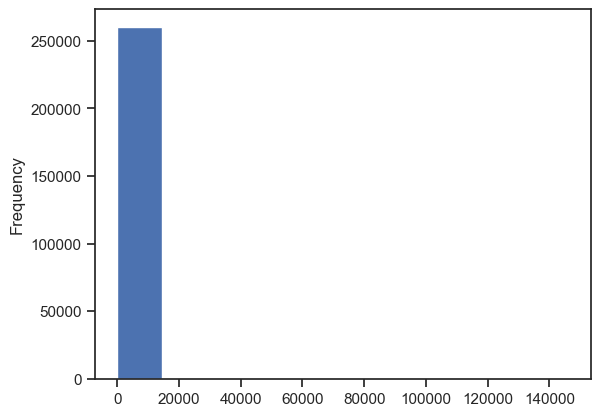

In [78]:
# To identify outliers in variables using histogram to see data distribution, service charge for e.g
df_rental['service charge'].plot.hist()

In [79]:
# To identify outliers using statistical method
def find_outliers_IQR(df_rental):

    q1=df_rental.quantile(0.25)

    q3=df_rental.quantile(0.75)

    IQR=q3-q1

    outliers = df_rental[((df_rental<(q1-1.5*IQR)) | (df_rental>(q3+1.5*IQR)))]

    return outliers

In [80]:
# To print outliers for service charge
outliers = find_outliers_IQR(df_rental['service charge'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers


number of outliers: 8741
max outlier value: 146118.0
min outlier value: 333.0


22         346.0
96         450.0
115        340.0
165        370.0
182        370.0
           ...  
268606    1100.0
268644     342.0
268714     350.0
268771     450.0
268806     400.0
Name: service charge, Length: 8741, dtype: float64

In [81]:
# To pass other columns through the outlier check
outliers_all = find_outliers_IQR(df_rental[['service charge','picture count', 'telekom upload speed', 'total rent', 'year constructed', 'base rent', 'living space', 'number of rooms', 'energy need']])

outliers_all

,service charge,picture count,telekom upload speed,total rent,year constructed,base rent,living space,number of rooms,energy need
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1871.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
268845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# To address outliers by replacing outliers using imputation as if they were missing values

def impute_outliers_IQR(df_rental):

    q1=df_rental.quantile(0.25)

    q3=df_rental.quantile(0.75)

    IQR=q3-q1

    upper = df_rental[~(df_rental>(q3+1.5*IQR))].max()

    lower = df_rental[~(df_rental<(q1-1.5*IQR))].min()

    df_rental = np.where(df_rental > upper,

       df_rental.mean(),

       np.where(df_rental < lower, df_rental.mean(), df_rental))

    return df_rental

In [83]:
# To impute the service charge column
df_rental['service charge'] = impute_outliers_IQR(df_rental['service charge'])

df_rental.describe()['service charge']

count    260228.00000
mean        140.80153
std          63.92080
min           0.00000
25%          95.00000
50%         135.00000
75%         180.00000
max         332.50000
Name: service charge, dtype: float64

In [84]:
# To impute the picture count column
df_rental['picture count'] = impute_outliers_IQR(df_rental['picture count'])

df_rental.describe()['picture count']

count    267080.000000
mean          9.091315
std           4.936095
min           0.000000
25%           6.000000
50%           9.000000
75%          12.000000
max          23.000000
Name: picture count, dtype: float64

In [85]:
# To impute the telekom upload speed column
df_rental['telekom upload speed'] = impute_outliers_IQR(df_rental['telekom upload speed'])

df_rental.describe()['telekom upload speed']

count    234058.000000
mean         28.748894
std          16.248807
min           1.000000
25%          10.000000
50%          40.000000
75%          40.000000
max          40.000000
Name: telekom upload speed, dtype: float64

In [86]:
# To impute the total rent column
df_rental['total rent'] = impute_outliers_IQR(df_rental['total rent'])

df_rental.describe()['total rent']

count    226847.000000
mean        730.713289
std         336.882239
min           0.000000
25%         470.000000
50%         650.000000
75%         901.742051
max        1752.000000
Name: total rent, dtype: float64

In [87]:
# To impute the base rent column
df_rental['base rent'] = impute_outliers_IQR(df_rental['base rent'])

df_rental.describe()['base rent']

count    267080.000000
mean        570.198651
std         296.227386
min           0.000000
25%         338.000000
50%         490.000000
75%         710.000000
max        1490.500000
Name: base rent, dtype: float64

In [88]:
# To impute the living space column
df_rental['living space'] = impute_outliers_IQR(df_rental['living space'])

df_rental.describe()['living space']

count    267080.000000
mean         69.519138
std          23.605479
min           5.000000
25%          54.020000
50%          67.400000
75%          82.460000
max         136.500000
Name: living space, dtype: float64

In [89]:
# To impute the number of rooms column
df_rental['number of rooms'] = impute_outliers_IQR(df_rental['number of rooms'])

df_rental.describe()['number of rooms']

count    267080.000000
mean          2.546178
std           0.841627
min           1.000000
25%           2.000000
50%           2.642205
75%           3.000000
max           4.500000
Name: number of rooms, dtype: float64

In [90]:
# To impute the energy need column
df_rental['energy need'] = impute_outliers_IQR(df_rental['energy need'])

df_rental.describe()['energy need']

count    161295.000000
mean        109.414573
std          43.428407
min           0.100000
25%          79.000000
50%         107.000000
75%         135.700000
max         233.000000
Name: energy need, dtype: float64

In [91]:
# To impute the year constructed column
df_rental['year constructed'] = impute_outliers_IQR(df_rental['year constructed'])

df_rental.describe()['year constructed']

count    210418.000000
mean       1968.986634
std          36.833610
min        1881.000000
25%        1952.000000
50%        1972.000000
75%        1996.000000
max        2029.000000
Name: year constructed, dtype: float64

# To create correlation matrix heatmap 

In [92]:
df_rental.corr()

/var/folders/l2/7rhjv6b94rxchmxgsmwrbhr80000gn/T/ipykernel_4807/1634427005.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_rental.corr()


,service charge,newly constructed,balcony,picture count,telekom upload speed,total rent,year constructed,kitchen,cellar,base rent,living space,lift,number of rooms,energy need,floor,garden,lastRefurbish,electricityBasePrice
service charge,1.000000,0.189538,0.231205,0.183174,0.021089,0.582469,0.180128,0.108818,0.077075,0.526552,0.589645,0.228010,0.429855,-0.110587,-0.009707,0.049325,0.083727,0.028277
newly constructed,0.189538,1.000000,0.148044,0.016832,0.022830,0.299003,0.447108,0.042600,-0.003446,0.310104,0.168278,0.323269,0.078424,-0.371210,-0.014496,0.004006,0.091796,-0.030988
balcony,0.231205,0.148044,1.000000,0.107531,0.013490,0.300431,0.309252,0.076390,0.174026,0.280786,0.257015,0.214452,0.205475,-0.204621,0.006485,0.008301,0.067646,0.002286
picture count,0.183174,0.016832,0.107531,1.000000,0.010406,0.243753,0.006426,0.149744,0.058351,0.246217,0.220221,0.080653,0.148626,-0.052949,-0.001293,0.101066,0.059685,0.043764
telekom upload speed,0.021089,0.022830,0.013490,0.010406,1.000000,0.022046,-0.037862,-0.014259,0.024476,0.021781,-0.007999,0.014428,-0.000379,0.007989,0.003585,-0.008964,0.009505,0.012191
total rent,0.582469,0.299003,0.300431,0.243753,0.022046,1.000000,0.290039,0.250656,0.028089,0.954021,0.646044,0.290622,0.426321,-0.189886,-0.015327,0.029857,0.192603,-0.000055
year constructed,0.180128,0.447108,0.309252,0.006426,-0.037862,0.290039,1.000000,0.130724,0.011443,0.292535,0.137440,0.363915,0.062855,-0.424438,0.012762,-0.061583,0.164976,-0.088821
kitchen,0.108818,0.042600,0.076390,0.149744,-0.014259,0.250656,0.130724,1.000000,0.004800,0.269831,0.034755,0.133966,-0.072486,-0.054507,-0.013374,0.070883,0.084350,-0.037186
cellar,0.077075,-0.003446,0.174026,0.058351,0.024476,0.028089,0.011443,0.004800,1.000000,0.014972,0.072494,0.056145,0.109780,-0.017117,-0.015255,0.113992,-0.007438,0.041851
base rent,0.526552,0.310104,0.280786,0.246217,0.021781,0.954021,0.292535,0.269831,0.014972,1.000000,0.609352,0.281294,0.386347,-0.206346,-0.019517,0.039925,0.194791,0.002637


/var/folders/l2/7rhjv6b94rxchmxgsmwrbhr80000gn/T/ipykernel_4807/3689837941.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_rental.corr())


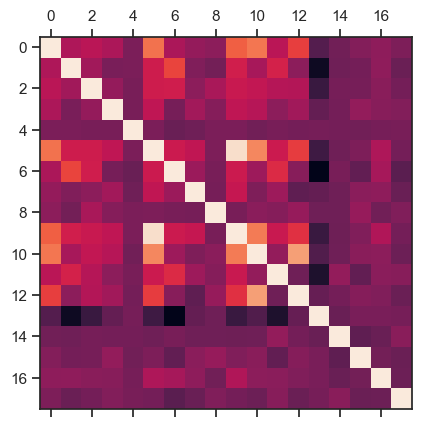

In [93]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_rental.corr())
plt.show()

/var/folders/l2/7rhjv6b94rxchmxgsmwrbhr80000gn/T/ipykernel_4807/3754978208.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_rental.corr())


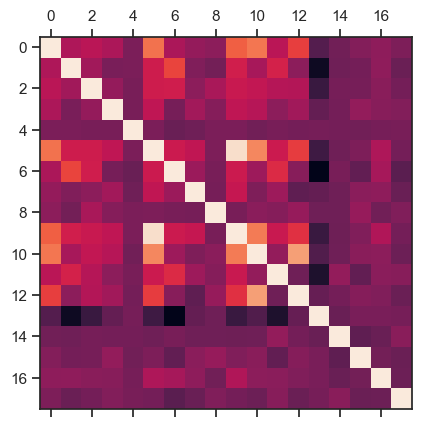

In [94]:
# Save figure
plt.matshow(df_rental.corr())
plt.savefig("out.png")

In [95]:
#current dir
cwd = os.getcwd()
cwd

'/Users/oluwaseunodusanya/Desktop/23.07.2023_Germany Apartment Rental Offer Analysis/03 Scripts'

In [98]:
df_rental.corr()

/var/folders/l2/7rhjv6b94rxchmxgsmwrbhr80000gn/T/ipykernel_4807/1634427005.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_rental.corr()


,service charge,newly constructed,balcony,picture count,telekom upload speed,total rent,year constructed,kitchen,cellar,base rent,living space,lift,number of rooms,energy need,floor,garden,lastRefurbish,electricityBasePrice
service charge,1.000000,0.189538,0.231205,0.183174,0.021089,0.582469,0.180128,0.108818,0.077075,0.526552,0.589645,0.228010,0.429855,-0.110587,-0.009707,0.049325,0.083727,0.028277
newly constructed,0.189538,1.000000,0.148044,0.016832,0.022830,0.299003,0.447108,0.042600,-0.003446,0.310104,0.168278,0.323269,0.078424,-0.371210,-0.014496,0.004006,0.091796,-0.030988
balcony,0.231205,0.148044,1.000000,0.107531,0.013490,0.300431,0.309252,0.076390,0.174026,0.280786,0.257015,0.214452,0.205475,-0.204621,0.006485,0.008301,0.067646,0.002286
picture count,0.183174,0.016832,0.107531,1.000000,0.010406,0.243753,0.006426,0.149744,0.058351,0.246217,0.220221,0.080653,0.148626,-0.052949,-0.001293,0.101066,0.059685,0.043764
telekom upload speed,0.021089,0.022830,0.013490,0.010406,1.000000,0.022046,-0.037862,-0.014259,0.024476,0.021781,-0.007999,0.014428,-0.000379,0.007989,0.003585,-0.008964,0.009505,0.012191
total rent,0.582469,0.299003,0.300431,0.243753,0.022046,1.000000,0.290039,0.250656,0.028089,0.954021,0.646044,0.290622,0.426321,-0.189886,-0.015327,0.029857,0.192603,-0.000055
year constructed,0.180128,0.447108,0.309252,0.006426,-0.037862,0.290039,1.000000,0.130724,0.011443,0.292535,0.137440,0.363915,0.062855,-0.424438,0.012762,-0.061583,0.164976,-0.088821
kitchen,0.108818,0.042600,0.076390,0.149744,-0.014259,0.250656,0.130724,1.000000,0.004800,0.269831,0.034755,0.133966,-0.072486,-0.054507,-0.013374,0.070883,0.084350,-0.037186
cellar,0.077075,-0.003446,0.174026,0.058351,0.024476,0.028089,0.011443,0.004800,1.000000,0.014972,0.072494,0.056145,0.109780,-0.017117,-0.015255,0.113992,-0.007438,0.041851
base rent,0.526552,0.310104,0.280786,0.246217,0.021781,0.954021,0.292535,0.269831,0.014972,1.000000,0.609352,0.281294,0.386347,-0.206346,-0.019517,0.039925,0.194791,0.002637


/var/folders/l2/7rhjv6b94rxchmxgsmwrbhr80000gn/T/ipykernel_4807/164590230.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_rental.corr(), fignum=f.number) # type of plot


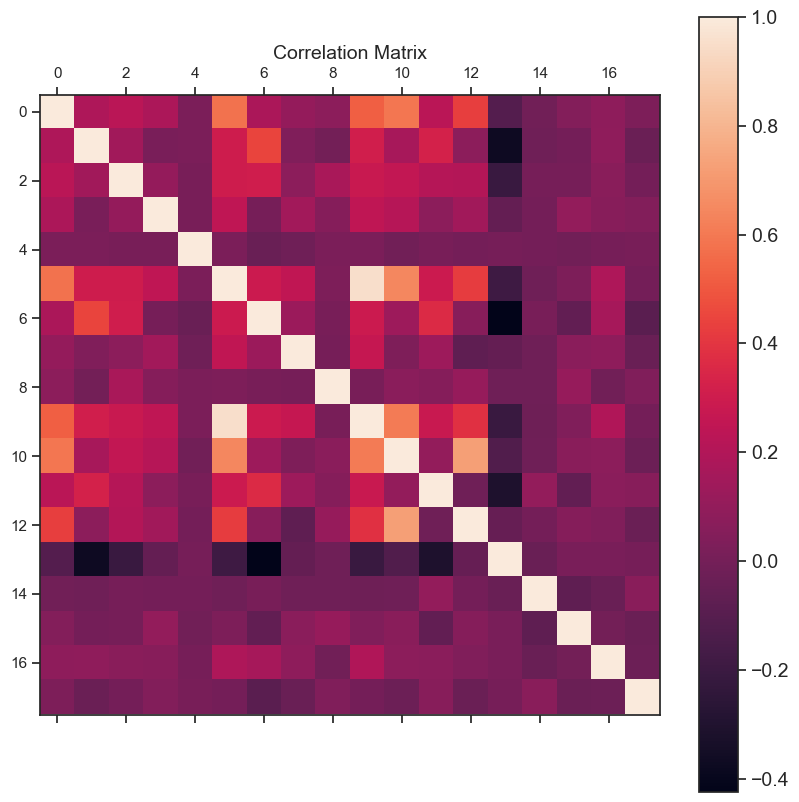

In [99]:
# add labels and a legend for the large correlation map

f = plt.figure(figsize=(10,10)) # figure size 
plt.matshow(df_rental.corr(), fignum=f.number) # type of plot
# plt.xticks(range(df_rental.shape[1]), df_rental.columns, fontsize=10, rotation=90) # x axis labels
# plt.yticks(range(df_rental.shape[1]), df_rental.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig("corr_rental.png")  #save

/var/folders/l2/7rhjv6b94rxchmxgsmwrbhr80000gn/T/ipykernel_4807/3326854798.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_rental.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to


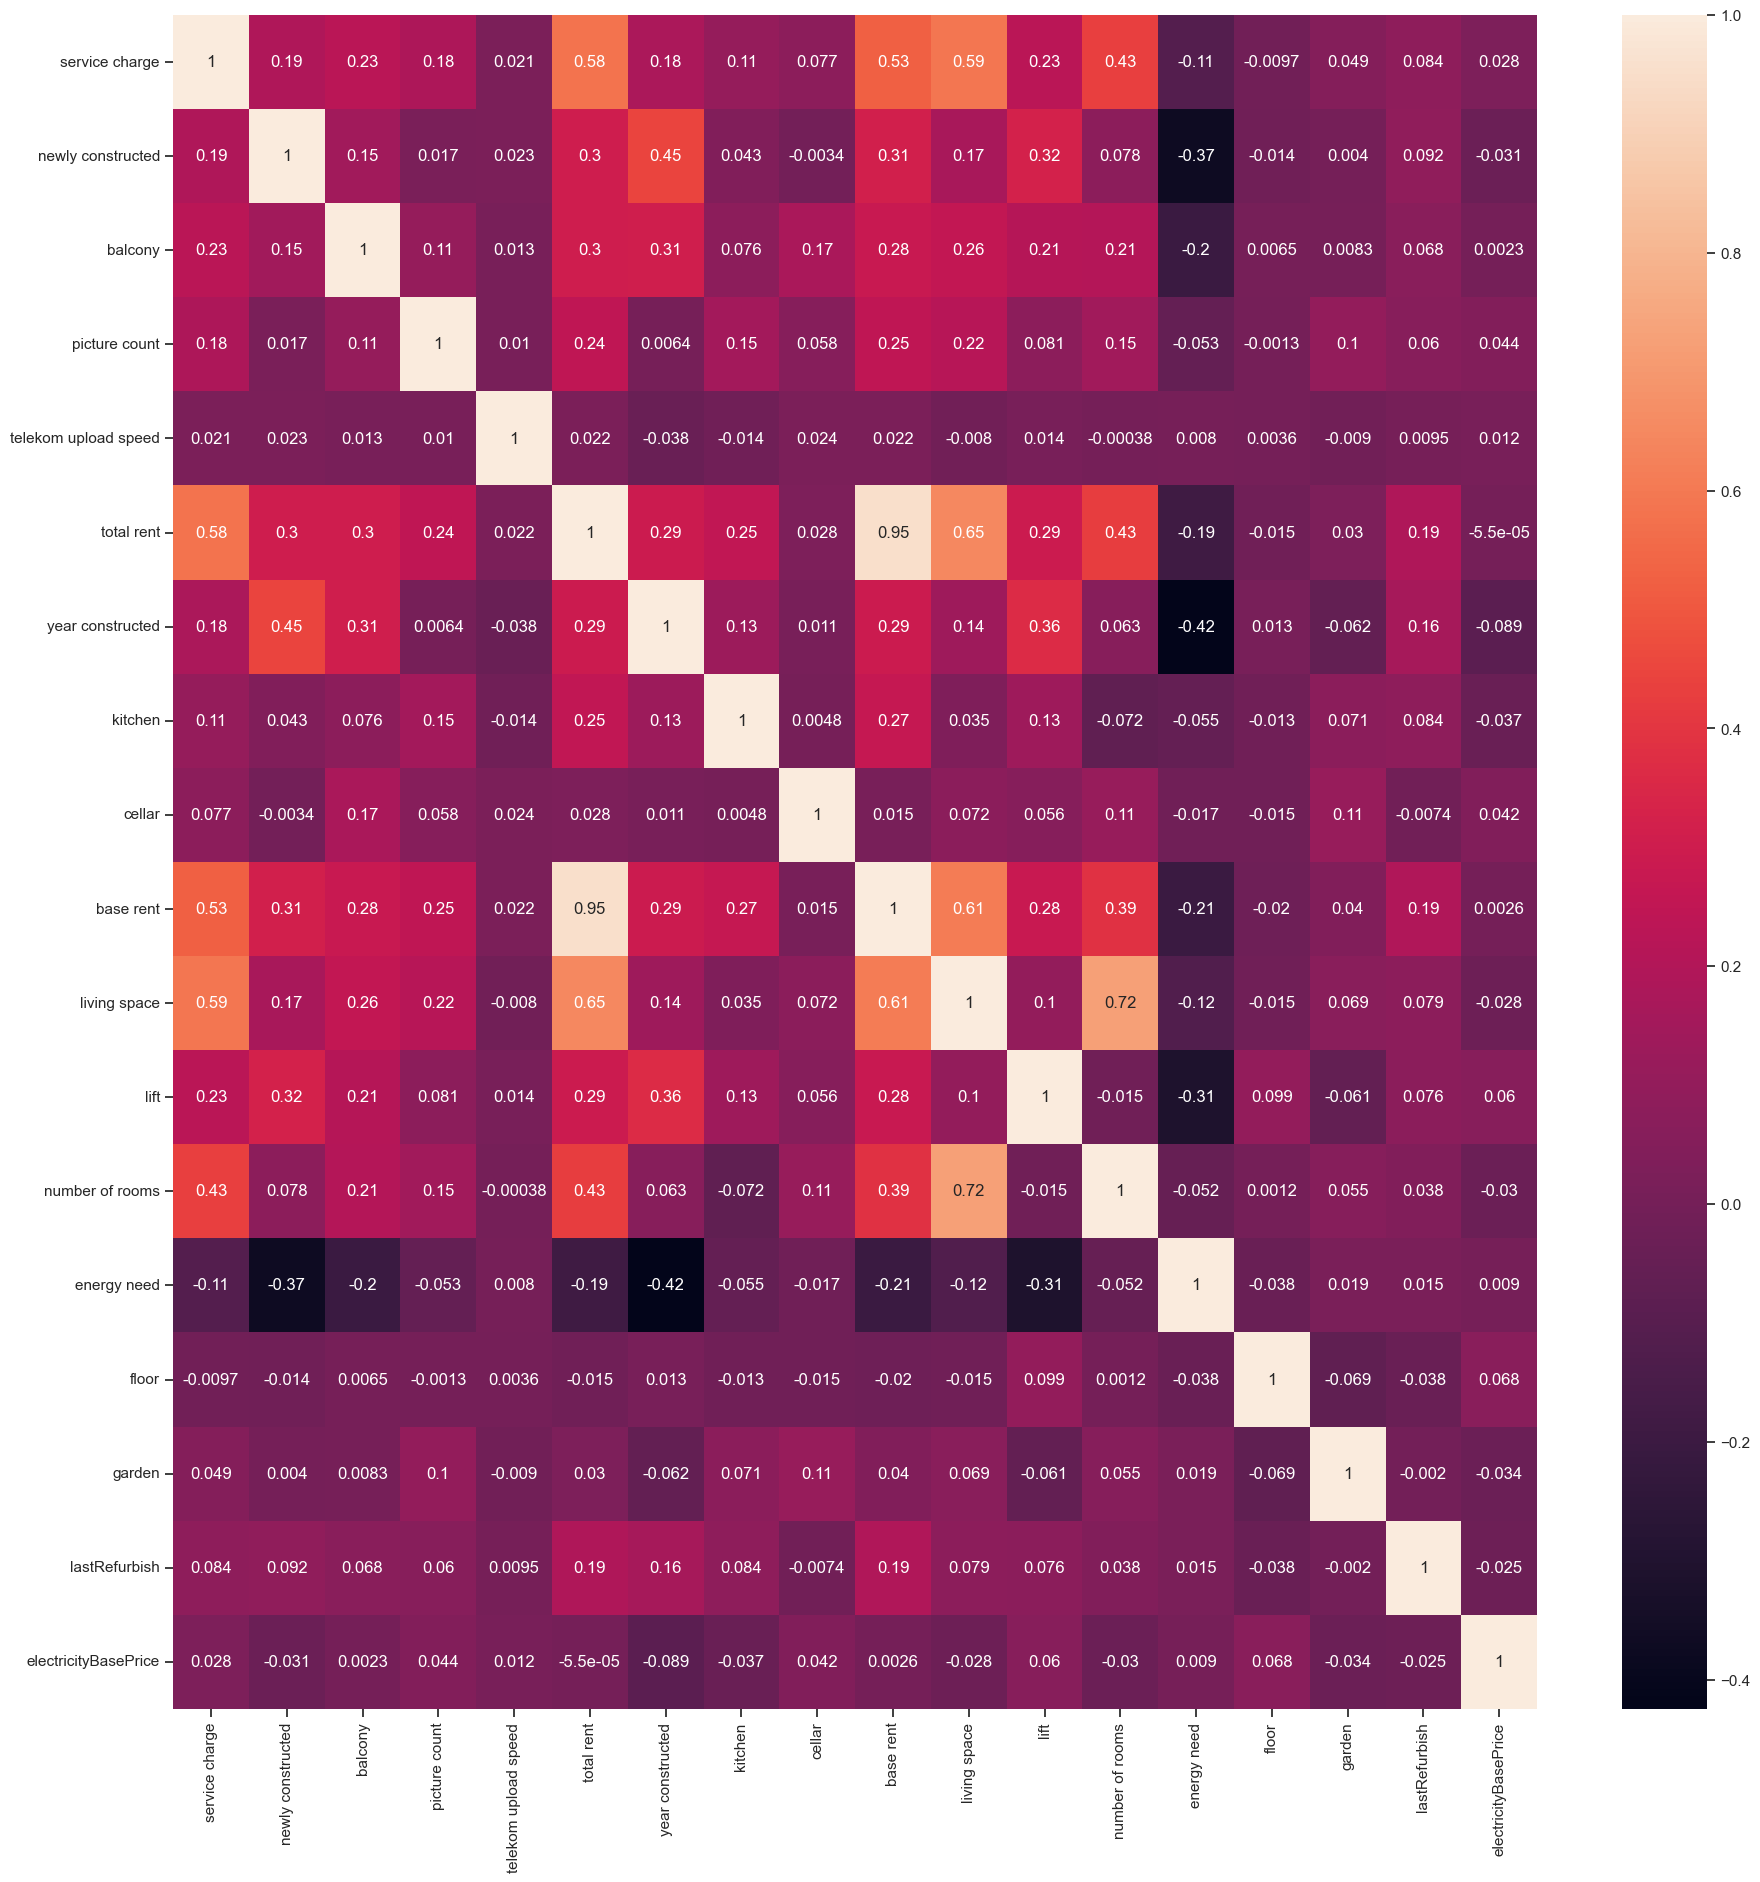

In [100]:
# To create correlation heatmap using seaborn
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(22,22))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_rental.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### It is obvious from the plot that the total price and base price of apartments, which are the independent variable in the data set, are strongly correlated with service charge. Also the number of rooms and living space are strongly correlated with service charge. Number of rooms and living space are strongly correlated.  living space is strongly correlated with total rent and base rent. The most interesting and strongest correlation is seen between base rent and total rent. Other relationships ranges from positively weak correlation to negatively weak correlation

In [101]:
# To examine correlation between selected variable
selected_variables = ['service charge', 'picture count', 'base rent', 'total rent', 'living space', 'number of rooms']

In [102]:
df_selected_variables = df_rental[selected_variables]

In [103]:
df_selected_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267080 entries, 0 to 268849
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   service charge   260228 non-null  float64
 1   picture count    267080 non-null  float64
 2   base rent        267080 non-null  float64
 3   total rent       226847 non-null  float64
 4   living space     267080 non-null  float64
 5   number of rooms  267080 non-null  float64
dtypes: float64(6)
memory usage: 14.3 MB


In [104]:
df_selected_variables.corr()

,service charge,picture count,base rent,total rent,living space,number of rooms
service charge,1.000000,0.183174,0.526552,0.582469,0.589645,0.429855
picture count,0.183174,1.000000,0.246217,0.243753,0.220221,0.148626
base rent,0.526552,0.246217,1.000000,0.954021,0.609352,0.386347
total rent,0.582469,0.243753,0.954021,1.000000,0.646044,0.426321
living space,0.589645,0.220221,0.609352,0.646044,1.000000,0.723555
number of rooms,0.429855,0.148626,0.386347,0.426321,0.723555,1.000000


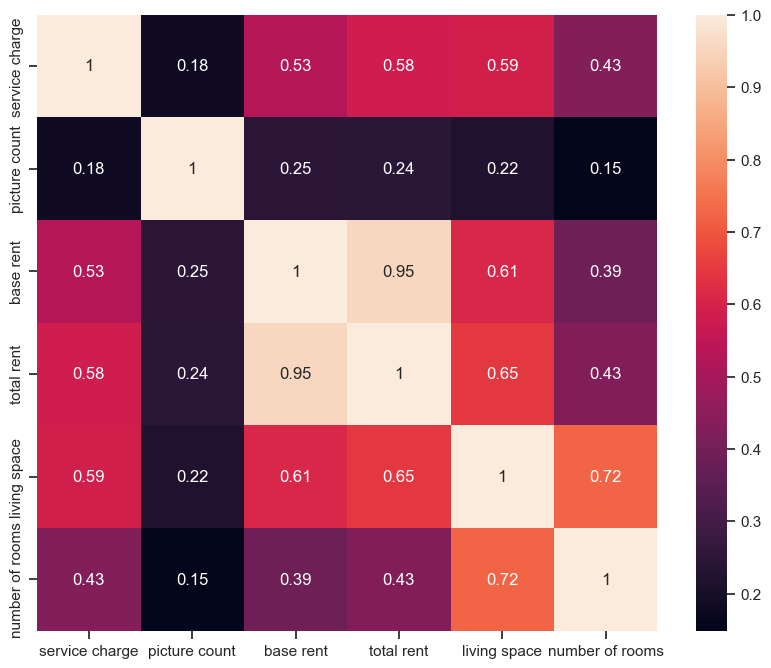

In [105]:
# To create correlation heatmap using seaborn
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_selected_variables.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Correlation matrix between the selected variables confirmed strong relationship between selected variables

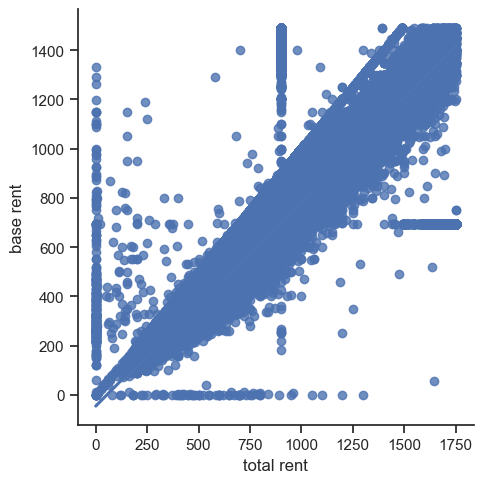

In [106]:
# Create a scatterplot for the "total rent" and "base rent" columns in seaborn

sns.lmplot(x = 'total rent', y = 'base rent', data = df_selected_variables)

### The plot confirmed the very strong relationship between the variables i.e the higher the base rent, the higher the total rent

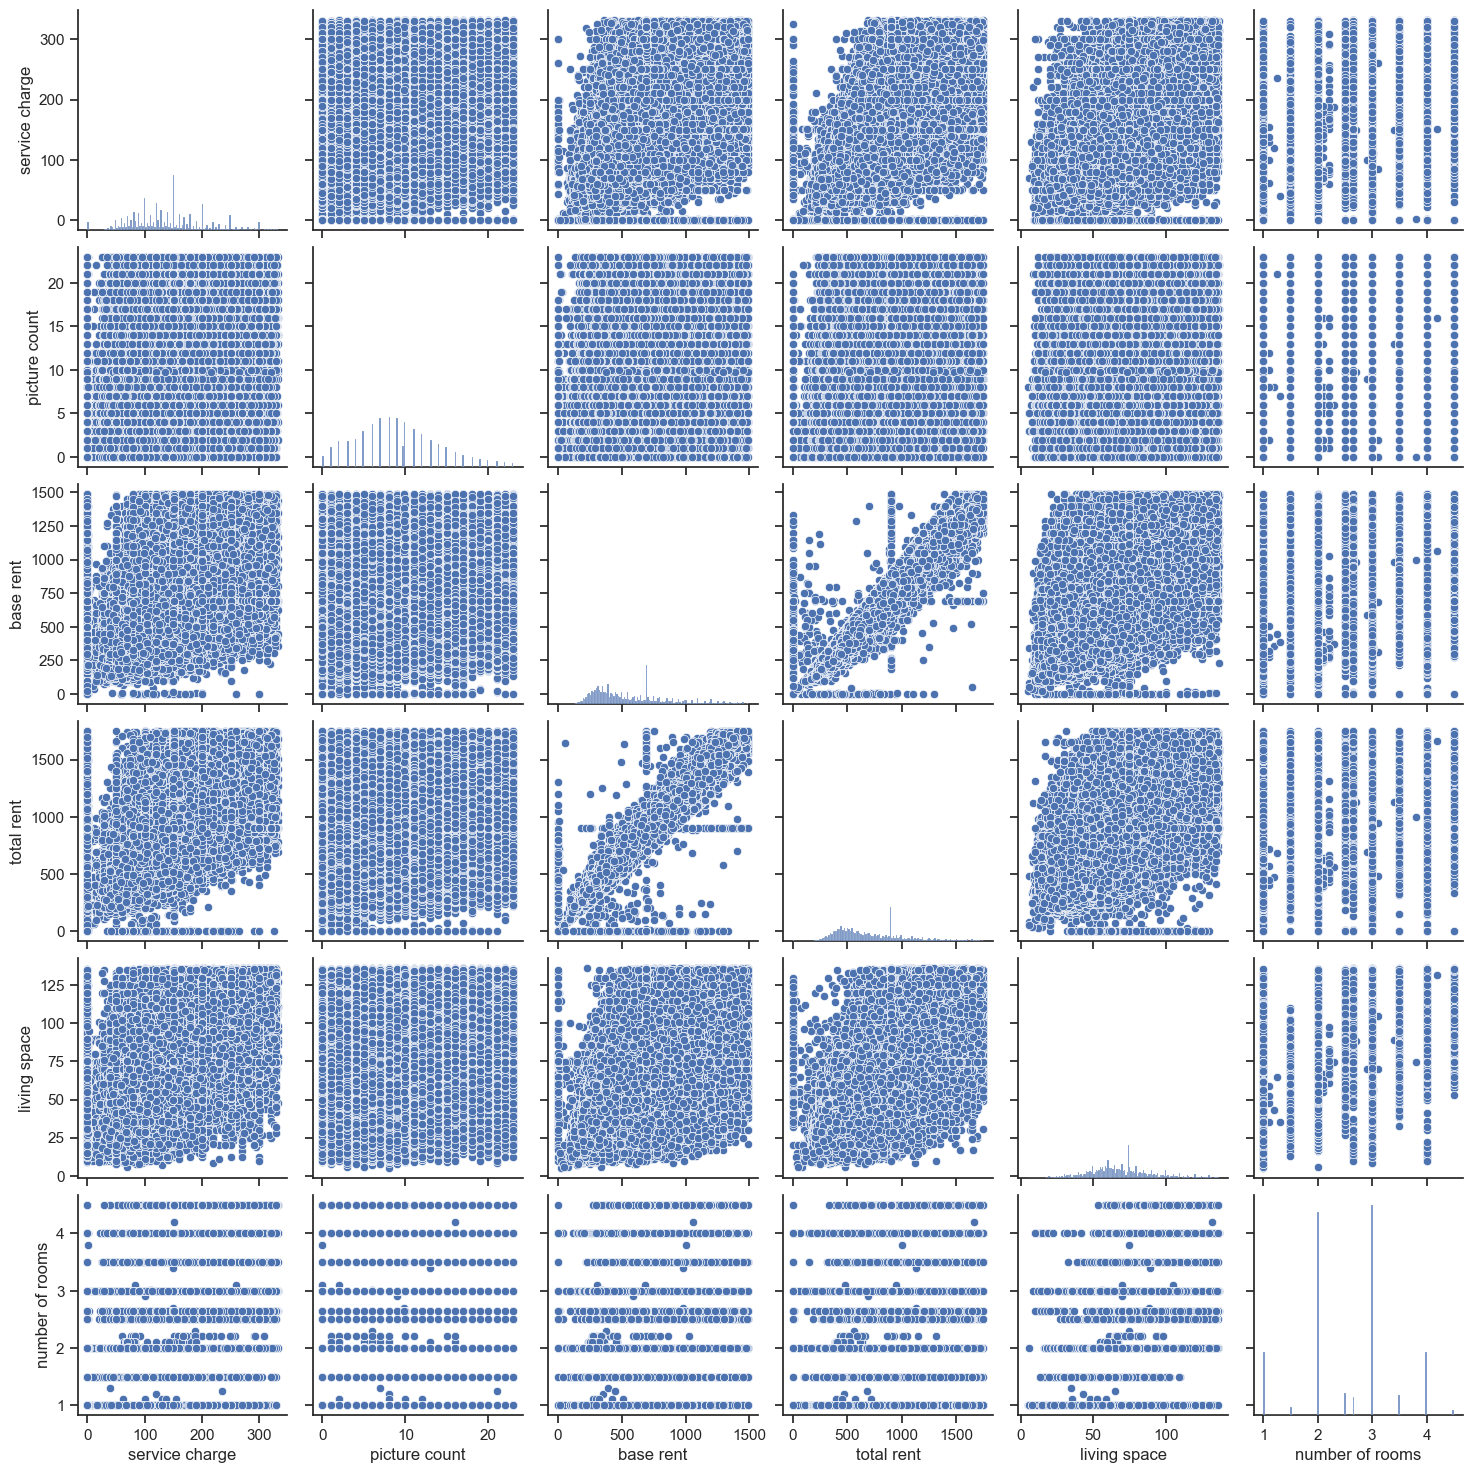

In [107]:
# Create a pair plot between the selected variables
g = sns.pairplot(df_selected_variables)

<Axes: xlabel='base rent', ylabel='Count'>

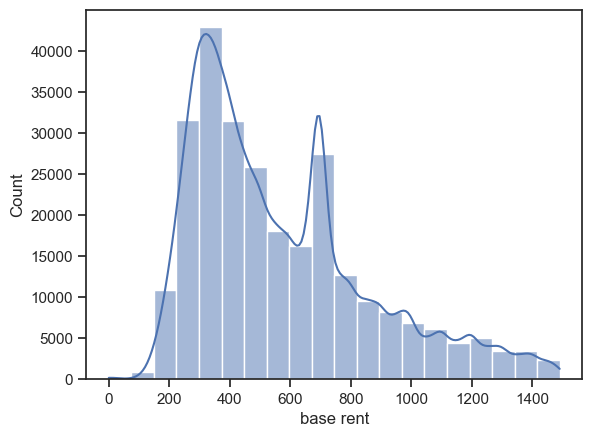

In [108]:
# To create categorical plot for variables using histogram to visualize the distribution of the variables(base rent)
sns.histplot(df_rental['base rent'], bins = 20, kde = True)

<Axes: xlabel='total rent', ylabel='Count'>

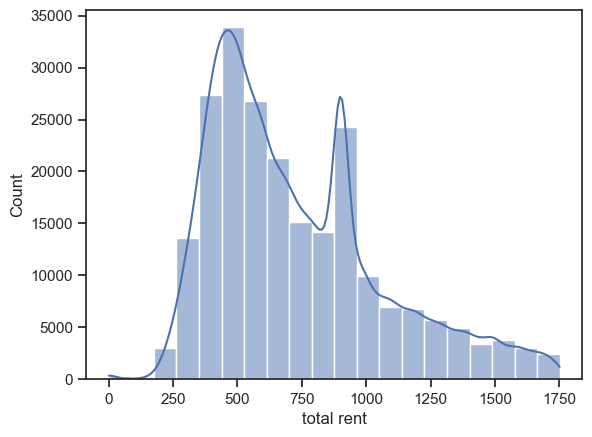

In [109]:
# To create categorical plot for variables using histogram to visualize the distribution of the variables(total rent)
sns.histplot(df_rental['total rent'], bins = 20, kde = True)

### Based on this, you can create the following categories for base rent:

“Low base rent” < 200
“Medium base rent” >= 200 and <700
“High base rent” >= 700

In [110]:
# To create categories for the base rent
df_rental.loc[df_rental['base rent'] < 200, 'base rent offer'] = 'Low base rent'

In [111]:
df_rental.loc[(df_rental['base rent'] >= 200) & (df_rental['base rent'] < 700), 'base rent offer'] = 'Middle base rent'

In [112]:
df_rental.loc[df_rental['base rent'] >= 700, 'base rent offer'] = 'High base rent'

In [113]:
df_rental['base rent offer'].value_counts(dropna = False)

Middle base rent    191235
High base rent       69472
Low base rent         6373
Name: base rent offer, dtype: int64

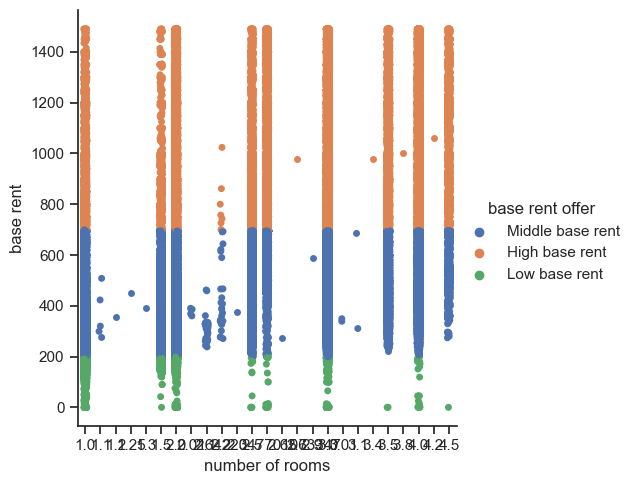

In [114]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="number of rooms", y="base rent", hue="base rent offer", data=df_rental)

In [115]:
# fig = g.get_figure()
g.savefig("out.png") 

# Again, the image will be saved in the working directory. 

### The plot indicates that the three categories of base rents is seen across the different number of rooms. Some low base rents are found in apartments with high room numbers. 

### Based on this, you can create the following categories for total rent:

“Low rental offer” < 300
“Medium rental offer” >= 300 and <900
“High rental offer” >= 900

In [116]:
# To create categories for the rental offer
df_rental.loc[df_rental['total rent'] < 300, 'rental offer'] = 'Low rental offer'

In [117]:
df_rental.loc[(df_rental['total rent'] >= 300) & (df_rental['total rent'] < 900), 'rental offer'] = 'Middle rental offer'

In [118]:
df_rental.loc[df_rental['total rent'] >= 900, 'rental offer'] = 'High rental offer'

In [119]:
df_rental['rental offer'].value_counts()

Middle rental offer    151714
High rental offer       67915
Low rental offer         7218
Name: rental offer, dtype: int64

## Analysis Questions
** How stable is the rental market in Germany? Rental market fluctuates in Germany
** What are the major factors that determine the rental offer of apartments in Germany? service charge, base rent, number of rooms, living space.
** How have rental prices in Germany evolved over time on the selected dates?
** Which states/cities in Germany offer more expensive rents than the others?
** Is there a correlation between the size of the city or urban center and rental prices in Germany?  
** Can external factors, such as inflation or population growth be correlated with the observed rental market trends during the selected time frames?   

## Initial Hypothesis
Rental prices have consistently increased across Germany during the selected dates.
Major cities and urban centers will exhibit the highest rental prices compared to smaller towns and rural regions.

## Additional Hypothesis
The higher the base rent offer of an apartment, the higher the total rental offer

In [120]:
# To export clean df_rental data
df_rental.to_csv(os.path.join(path, '02 Data','02 Prepared Data','clean_apartment_rental_data.csv'))